Перші рядки таблиці:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN

Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Частка пропусків в кожній колонці:
Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           

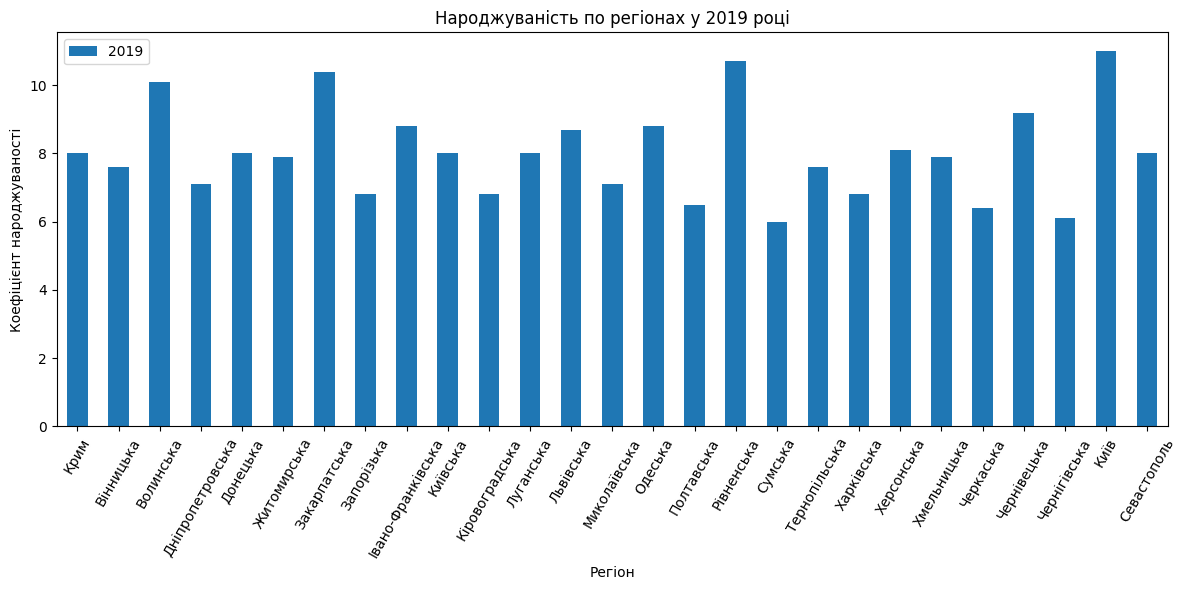

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, header=0, thousands=' ', decimal=',') 
table_index = 12 # Коефіцієнт народжуваності в регіонах України (1950—2019)
df = tables[table_index]


#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
df = df.replace('—', np.nan)
columns = df.columns.values[1:] # Excluding 'Регіон' column
df[columns] = df[columns].apply(pd.to_numeric) # Change all columns type to numeric


# Виводимо перші рядки таблиці
print("Перші рядки таблиці:")
print(df.head())



# Визначаємо типи всіх стовпців
print("\nТипи стовпців:")
print(df.dtypes)



# Рахуємо частку пропусків в кожній колонці
print("\nЧастка пропусків в кожній колонці:")
print(df.isnull().sum())


# Видаляємо дані по всій країні (останній рядок)
df.drop([len(df)-1], inplace=True)



# Замінюємо відсутні дані в стовпцях середніми значеннями
mean_values = df.mean(numeric_only=True).round(1)
df.fillna(mean_values, inplace=True)

print(df)

# Отримуємо список регіонів, де рівень народжуваності у 2019 році вищий за середній по Україні
year = '2019'
avg = df[year].mean().round(1) # average for specified year
regions_above_average = df[year] > avg
df_more_avg = df[regions_above_average]
print(f"Average born rate in {year}: {avg}\n")
print(f'Regions with born rate more than average:')
df_more_avg[["Регіон"]]



# Знаходимо регіон з найвищою народжуваністю у 2014 році
year = '2014'
max_this_year = df[year].max()
max_this_year_region = df[df[year]==max_this_year]
print(f'Region(s) with biggest born rate in {year}:')
max_this_year_region[["Регіон"]]



# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
year = '2019'
data_year = df[['Регіон', year]]
data_year.plot(kind='bar', x='Регіон', y=year, figsize=(12, 6))
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.title(f'Народжуваність по регіонах у {year} році')
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()